### Student Information
Name: 邱茂宸

Student ID: 110041004

GitHub ID: Qmaochen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Preparation work

In [3]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
print(sys.version)

C:\Users\USER\Desktop\DataMining\Lab\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### Read Data with pandas

In [5]:
# categories
categories = ['positive', 'neutral', 'negative']

In [67]:
# read dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [68]:
# drop some columns which I think they are not really necessary 
df = df.drop(columns=['datetime', 'post_id', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'polarity', 'entities', 'label', 'author'])
df.head()

,type,subreddit,title,text,subjectivity,sentiment
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,1.0
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,0.0
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,1.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.000000,0.0


In [69]:
# change the sentiment column into nominal form
df['sentiment'] = df['sentiment'].replace({
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
})
df.head()
df.shape

(847, 6)

### Deal with missing value

In [70]:
# isnull()
df.isnull().sum()

type            0
subreddit       0
title           0
text            0
subjectivity    0
sentiment       0
dtype: int64

In [71]:
# check empty string
(df['text'] == '').sum()
(df['type'] == '').sum()
(df['subreddit'] == '').sum()
(df['title'] == '').sum()
# np.int64(0) represents there is no empty string

np.int64(0)

In [72]:
(df['subjectivity'] == 'None').sum()
(df['subjectivity'] == 'NaN').sum()
(df['subjectivity'] == '').sum()

np.int64(0)

### Dealing with Duplicate Data

In [73]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [74]:
df.drop_duplicates(keep=False, inplace=True)

In [75]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
841    False
842    False
843    False
845    False
846    False
Length: 813, dtype: bool

In [76]:
df.shape

(813, 6)

### Sampling

In [102]:
# sample 300 data
df_sample = df.sample(n=300)

In [103]:
df_sample.head()

,type,subreddit,title,text,subjectivity,sentiment
161,comment,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,"beginner help please!! i’m 22 y/o in usa, loo...",0.383333,positive
311,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,I know. America is fuxked and stupid.,1.000000,negative
362,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Held onto my egg futures too long now they are...,0.216667,negative
416,comment,StockMarket,$ U.S. dollar value (crashing),Nice!,1.000000,positive
101,comment,stocks,BREAKING: China raises tariffs on U.S. goods t...,Worry about your own country buddy.,0.000000,neutral


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# plot the graph to compare the distribution of sentiment in the whole data and the sampling data
full_counts = df['sentiment'].value_counts().sort_index()
sample_counts = df_sample['sentiment'].value_counts().sort_index()

print(full_counts)
print(sample_counts)

sentiment
negative    195
neutral     303
positive    315
Name: count, dtype: int64
sentiment
negative     73
neutral     118
positive    109
Name: count, dtype: int64


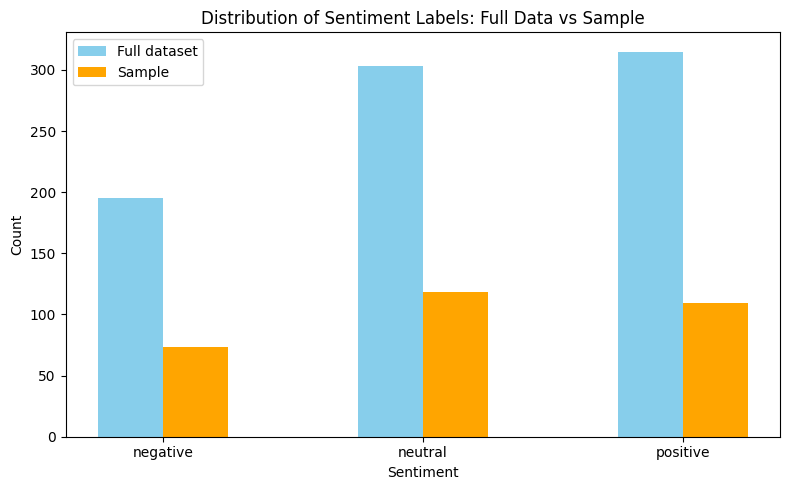

In [110]:
all_labels = ['negative', 'neutral', 'positive']
import numpy as np

x = np.arange(len(all_labels)) 
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x-width/2, full_counts, width, label='Full dataset', color='skyblue')
plt.bar(x+width/2, sample_counts, width, label='Sample', color='orange')

plt.xticks(x, all_labels)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels: Full Data vs Sample")
plt.legend()
plt.tight_layout()
plt.show()

# observation: we can find that the distribution of sentiment labels in full data is relatively similar to sampling data
# although the positivie one should be more than neutral one
# there is a trend which the number of negative labels is less than the other two 

### Feature Creation

In [113]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [151]:
# Add a new column consist of words in title and in text
df['titleandtext'] = df.apply(
    lambda row: row['title'] + row['text'],
    axis=1
)
df.head()

,type,subreddit,title,text,subjectivity,sentiment,unigrams,titleandtext
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,"[Retardation, menu, boys, !, WSB, back, Calls,...",Retardation is on the menu boys! WSB is so bac...
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,"[Retail, giant, TARGET, declined, 10, consecut...",Retail giant TARGET has now declined for 10 co...
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,"[feel, sitting, president, making, $, 415M, on...",How do you feel about a sitting president maki...
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,"[knows, ?, $, VMAR, Vision, Marine, Technologi...",Who knows more? $VMARVision Marine Technologie...
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.000000,neutral,"[Trump, administration, begging, Xi, Jinping, ...",The Trump administration is begging Xi Jinping...
...,...,...,...,...,...,...,...,...
841,comment,StockMarket,The Trump administration is begging Xi Jinping...,So countries “begging to stop the tariffs” and...,0.000000,neutral,"[Trump, administration, begging, Xi, Jinping, ...",The Trump administration is begging Xi Jinping...
842,comment,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.000000,neutral,"[$, MRIN, Marin, Software, killed, today, ., H...",$MRIN Marin Software killed it today. Hope som...
843,comment,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.000000,neutral,"[$, U.S., dollar, value, (, crashing, ), read, ?]",$ U.S. dollar value (crashing)Where can I read...
845,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.000000,neutral,"[Weekend, Discussion, Thread, Weekend, April, ...",Weekend Discussion Thread for the Weekend of A...


In [133]:
# transform the text in title and in text into unigrams
df['unigrams'] = df.apply(
    lambda row: word_tokenize(str(row['title'])) + word_tokenize(str(row['text'])),
    axis=1
)

In [134]:
df[0:4]['unigrams']

0    [Retardation, is, on, the, menu, boys, !, WSB,...
1    [Retail, giant, TARGET, has, now, declined, fo...
2    [How, do, you, feel, about, a, sitting, presid...
3    [Who, knows, more, ?, $, VMAR, Vision, Marine,...
Name: unigrams, dtype: object

In [142]:
# eliminate stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['unigrams'] = df['unigrams'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])
df.unigrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [Retardation, menu, boys, !, WSB, back, Calls,...
1      [Retail, giant, TARGET, declined, 10, consecut...
2      [feel, sitting, president, making, $, 415M, on...
3      [knows, ?, $, VMAR, Vision, Marine, Technologi...
4      [Trump, administration, begging, Xi, Jinping, ...
                             ...                        
841    [Trump, administration, begging, Xi, Jinping, ...
842    [$, MRIN, Marin, Software, killed, today, ., H...
843    [$, U.S., dollar, value, (, crashing, ), read, ?]
845    [Weekend, Discussion, Thread, Weekend, April, ...
846    [Someone, post, hotline, please, ., !, [, img,...
Name: unigrams, Length: 813, dtype: object

In [152]:
# eliminate stopwords in titletext
df['titleandtext'] = df['titleandtext'].apply(
    lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words])
)

In [153]:
df.head()

,type,subreddit,title,text,subjectivity,sentiment,unigrams,titletext,titleandtext
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,"[Retardation, menu, boys, !, WSB, back, Calls,...",Retardation is on the menu boys! WSB is so bac...,Retardation menu boys! WSB backCalls retards
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,"[Retail, giant, TARGET, declined, 10, consecut...",Retail giant TARGET has now declined for 10 co...,Retail giant TARGET declined 10 consecutive we...
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,"[feel, sitting, president, making, $, 415M, on...",How do you feel about a sitting president maki...,feel sitting president making $415M one day pu...
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,"[knows, ?, $, VMAR, Vision, Marine, Technologi...",Who knows more? $VMARVision Marine Technologie...,knows more? $VMARVision Marine Technologies In...
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.000000,neutral,"[Trump, administration, begging, Xi, Jinping, ...",The Trump administration is begging Xi Jinping...,Trump administration begging Xi Jinping call T...


### Feature Subset Selection

In [137]:
count_vect.get_feature_names_out()[2347]

'is'

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.titleandtext)
print(df_counts[0])

  (np.int32(0), np.int32(3531))	1
  (np.int32(0), np.int32(2707))	1
  (np.int32(0), np.int32(733))	1
  (np.int32(0), np.int32(4665))	1
  (np.int32(0), np.int32(558))	1
  (np.int32(0), np.int32(3533))	1


In [156]:
count_vect.get_feature_names_out()[2707]

'menu'

In [159]:
analyze = count_vect.build_analyzer()
analyze(df.titleandtext[0])

['retardation', 'menu', 'boys', 'wsb', 'backcalls', 'retards']

In [160]:
df_counts.shape

(813, 4704)

In [169]:
# Visualization for the distribution of words
plot_x = [count_vect.get_feature_names_out()[i] for i in range(20)]
plot_y = ["news_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

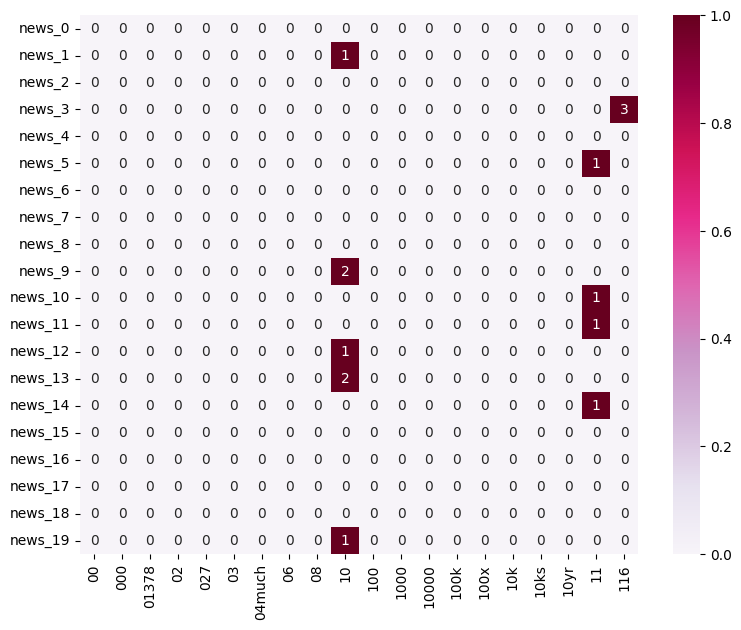

In [170]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [176]:
# sort X_counts via the times the words appear
# get top 30 words that appear a lot in the whole document
term_sum = np.array(df_counts.sum(axis=0)).ravel()
top_idx = term_sum.argsort()[::-1][:30]
plot_z = df_counts[0:30, top_idx].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0],
       [2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [177]:
plot_y = ["news_"+ str(i) for i in list(df.index)[0:30]]
plot_y

['news_0',
 'news_1',
 'news_2',
 'news_3',
 'news_4',
 'news_5',
 'news_6',
 'news_7',
 'news_8',
 'news_9',
 'news_10',
 'news_11',
 'news_12',
 'news_13',
 'news_14',
 'news_15',
 'news_16',
 'news_17',
 'news_18',
 'news_19',
 'news_20',
 'news_21',
 'news_22',
 'news_23',
 'news_24',
 'news_25',
 'news_26',
 'news_27',
 'news_28',
 'news_29']

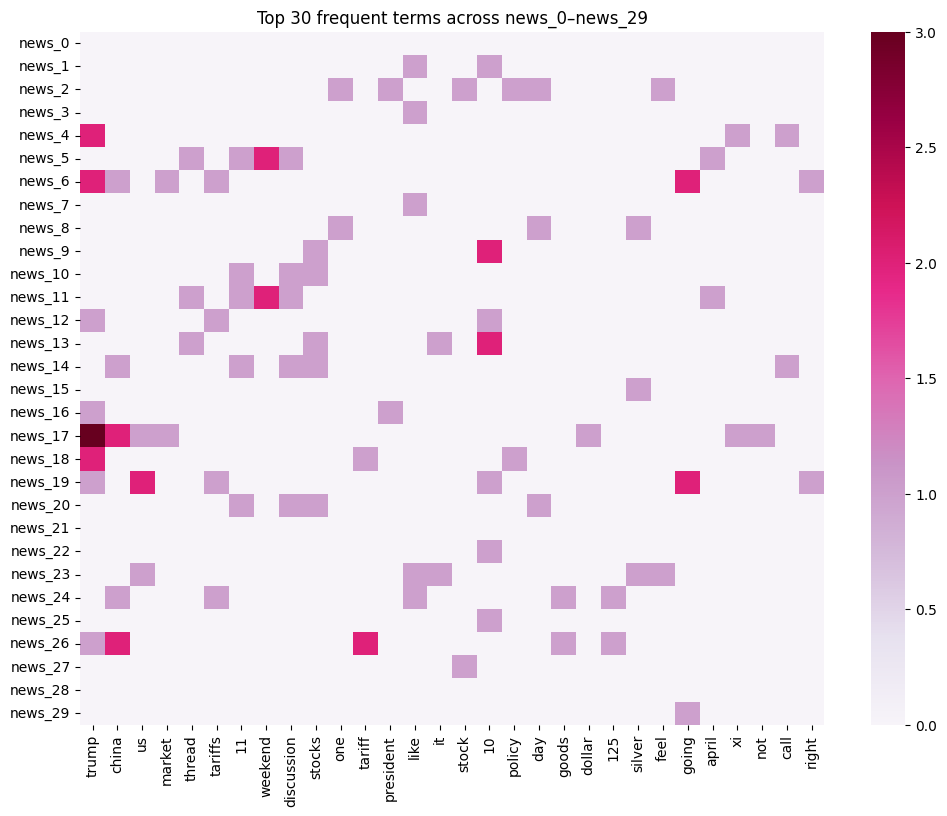

In [178]:
term_names = count_vect.get_feature_names_out()[top_idx]
df_todraw = pd.DataFrame(plot_z, columns = term_names, index = plot_y)
plt.figure(figsize=(12,9))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0)
plt.title("Top 30 frequent terms across news_0–news_29")
plt.show()

### Attribute Transformation/Aggregation

In [188]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [189]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [190]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

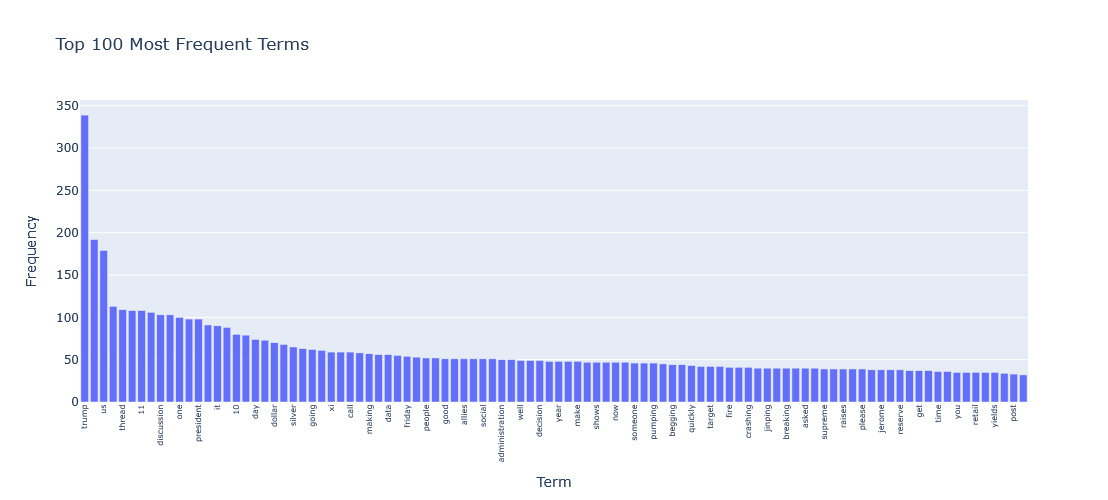

In [195]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n = 100
top_idx = term_frequencies.argsort()[::-1][:top_n] 

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

df_top = pd.DataFrame({'term': top_terms, 'frequency': top_freqs})

fig = px.bar(df_top,
             x='term', y='frequency',
             title=f'Top {top_n} Most Frequent Terms',
             labels={'term': 'Term', 'frequency': 'Frequency'},
             width=1200, height=500)
fig.update_layout(xaxis_tickangle=270, xaxis_tickfont=dict(size=8))
fig.show()

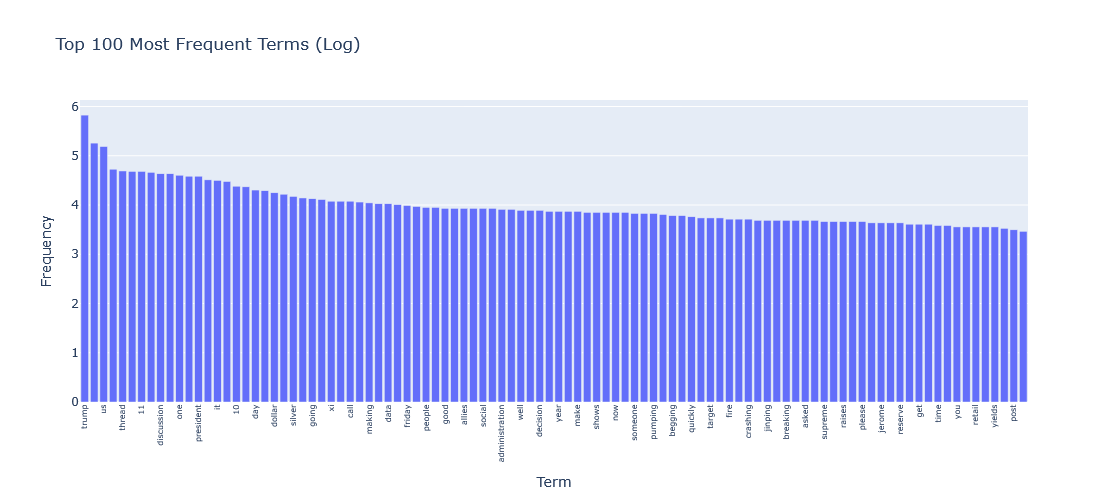

In [196]:
import math
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n = 100
top_idx = term_frequencies.argsort()[::-1][:top_n] 

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = np.log(term_frequencies[top_idx])

df_top = pd.DataFrame({'term': top_terms, 'frequency': top_freqs})

fig = px.bar(df_top,
             x='term', y='frequency',
             title=f'Top {top_n} Most Frequent Terms (Log)',
             labels={'term': 'Term', 'frequency': 'Frequency'},
             width=1200, height=500)
fig.update_layout(xaxis_tickangle=270, xaxis_tickfont=dict(size=8))
fig.show()

### Meaningful Visualization

Here I will use wordcloud to find if there are some words usually occur in a specific sentiment label. \
But there are so many unmeaningful tokens like ',', '$', etc. \
So I have to clean the unigrams first.

In [237]:
# clean the unigrams 
df['unigrams_clean'] = df['unigrams'].apply(
    lambda tokens: [t for t in tokens if t.isalpha()]
)
df.unigrams_clean

0      [Retardation, menu, boys, WSB, back, Calls, re...
1      [Retail, giant, TARGET, declined, consecutive,...
2      [feel, sitting, president, making, one, day, p...
3      [knows, VMAR, Vision, Marine, Technologies, re...
4      [Trump, administration, begging, Xi, Jinping, ...
                             ...                        
841    [Trump, administration, begging, Xi, Jinping, ...
842    [MRIN, Marin, Software, killed, today, Hope, s...
843                      [dollar, value, crashing, read]
845    [Weekend, Discussion, Thread, Weekend, April, ...
846                [Someone, post, hotline, please, img]
Name: unigrams_clean, Length: 813, dtype: object

In [228]:
!pip3 install wordcloud


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [232]:
!uv add wordcloud

Resolved 169 packages in 0.72ms
Audited 159 packages in 6ms


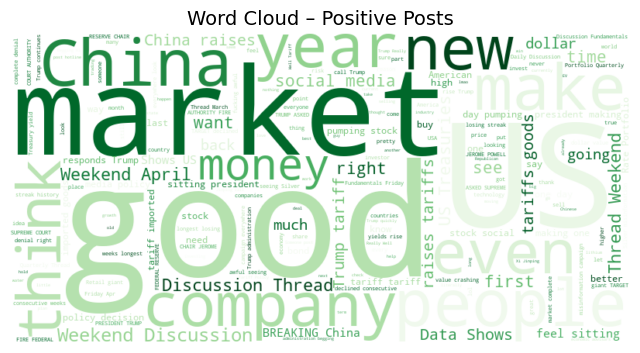

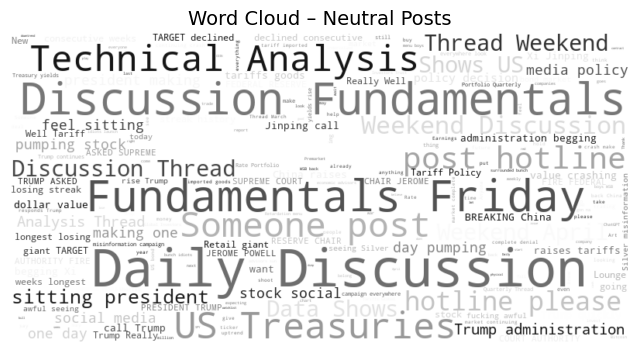

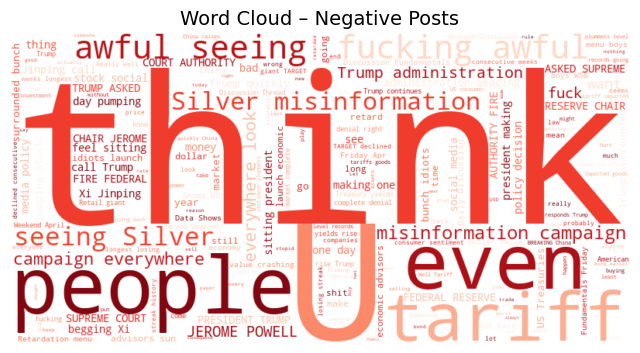

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and plot Word Clouds for each sentiment
for sentiment, color in zip(['positive', 'neutral', 'negative'],
                            ['Greens', 'Greys', 'Reds']):
    
    # Combine all tokens for that sentiment into a single string
    text = ' '.join([' '.join(tokens)
                     for tokens in df[df['sentiment'] == sentiment]['unigrams_clean']])

    # Build the word cloud
    wc = WordCloud(width=800, height=400,
                   background_color='white',
                   colormap=color).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud – {sentiment.capitalize()} Posts', fontsize=14)
    plt.show()

We can find that there are some dominant words in each category. \
First, for positive posts, dominant words are market, good, china, US, company, money, etc. \
Despite some positive words like good, money and so on, international trade discussions flourish and there are many posts discussed them in a positive frame. \
Second, for negative one, words like think, awful, misinformation, fucking, campaign dominant, which sometimes contain negative emotion. \
Also, the use of 'think' and 'people' might probably show subjective, frustrated tone in the posts. \
Third, there are almost neutral words falling into the category of neutral, such as techinal analysis, fundamentals, discussion, etc. \
This indicates posts mainly focused on sharing information rathan than emotion. 

# Phase 2

In [ ]:
### Begin Assignment Here